In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
from numba import jit, types
from scipy.sparse import diags
matplotlib.rcParams['animation.embed_limit'] = 2**128

from Wave_func_propagation import *
from Animation_func import *
from Transmiton_prob import *
from Fourier_transform import *

In [12]:
elementary_charge = 1.602176634e-19
hbar = 1.054571817e-34 # J s
m = 9.1093837015e-31 # kg
#m = 0.510998950e6
Energi_init = 27.5e-3 * elementary_charge# J
sigma_x = 200e-10
x_s = 40e-8
k_0 = np.sqrt(2*m*Energi_init)/hbar

L = 1200e-9

well_size = 6e-9
barrier_size = 1.2e-9
barrier_hight = 90e-3*elementary_charge


Potential_size = np.array([barrier_size, well_size, barrier_hight,0,0])




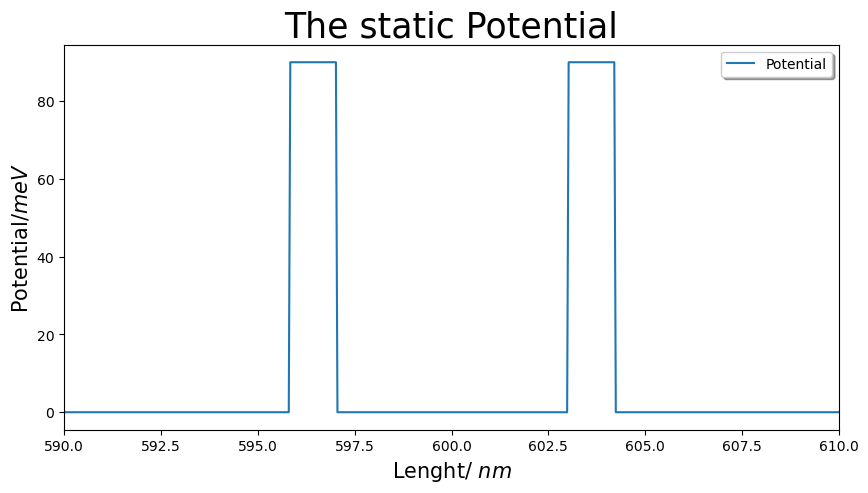

In [13]:
def Two_Potential_Barrier(x_axis, dx, time, Potential):

    #pot = np.zeros((len(time), len(x_axis)))
    pot = np.zeros(len(x_axis))
    middel = len(x_axis)/2 *dx
    barrier = Potential[0]
    well = Potential[1]

    left_edge_left = middel - (well/2 + barrier)
    righ_edge_left = middel - (well/2)
    left_edge_righ = middel + (well/2)
    righ_edge_righ = middel + (well/2 + barrier)
    # print(left_edge_left)

    righ_edge_righ_i = np.searchsorted(x_axis, righ_edge_righ, side='right')
    left_edge_righ_i = np.searchsorted(x_axis, left_edge_righ, side='right')
    righ_edge_left_i = np.searchsorted(x_axis, righ_edge_left, side='right')
    left_edge_left_i = np.searchsorted(x_axis, left_edge_left, side='right')

    pot[left_edge_left_i : righ_edge_left_i], pot[left_edge_righ_i : righ_edge_righ_i] = Potential[2], Potential[2]
    
    # const = Potential[4] *dt 

    # left_well_edge = middel - well/2
    # righ_well_edge = middel + well/2

    # left_well_edge_i = np.searchsorted(x_axis, left_well_edge, side='righ')
    # righ_well_edge_i = np.searchsorted(x_axis, righ_well_edge, side='righ')
    # print(pot.shape, left_well_edge_i,righ_well_edge_i)

    # pot[left_well_edge_i : righ_well_edge_i] = 10*Potential[3]*np.cos(const * time)

    return pot, Potential[2]



N_x = 15*int(2*k_0*L) + 1 
dx = L/(N_x-1)
v_g = hbar * k_0/m
x_axis = np.linspace(0.0, L, N_x, dtype=np.float64)

dt = 0.1 * hbar / ((hbar**2/(2*m*dx**2))+Potential_size[2])
T = 1.4*L/(2*v_g)
N_t = int(T/dt)
time =  np.linspace(0,T,N_t)
Potential_size = np.array([barrier_size, well_size, barrier_hight,5e-3 * elementary_charge,5e-3 * elementary_charge])
pot, v_max = Two_Potential_Barrier(x_axis, dx, time[-1], Potential_size)

plt.figure(figsize=(10,5))
plt.title('The static Potential', fontsize=25)
plt.plot(x_axis*1e9,pot/elementary_charge*1e3, label = 'Potential')
plt.xlim(590,610)
plt.xlabel('Lenght/ $nm$', fontsize=15)
plt.ylabel('Potential/${meV}$', fontsize=15)
plt.legend(shadow=True, loc='upper right')
plt.show()


In [14]:
Psi_t1, psi_imag_t1, psi_real_t1, x, dx, T, N_t, harm_pot_animat = Psi_propagation(Psi_initial, Two_Potential_Barrier, sigma_x, x_s, hbar, m, L, k_0,
                                                                Potential_size, t_dep_pot=False)

time_redused = 1#np.linspace(0,T,int(N_t/1000+3))



pot_barriers, v_max = Two_Potential_Barrier(x, dx, time_redused, Potential_size)

probability_tot, normalisation_trans, normalisation_reflec = probability_density(Psi_t1, -1, dx, Potential_size, x)


a,b,c=probability_density(Psi_t1, -1, dx, Potential_size, x)
print('Transmission probability is:',b*100,'%')



Transmission probability is: 24.69525562455049 %


In [15]:
Transformed_reflected, Transformed_transmited, Transformed_total, freq = Fourier_transformed(Psi_t1, -1 , dx , hbar, m, x, Potential_size)
print(Energi_init, k_0)

4.4059857435e-21 849581170.8160559


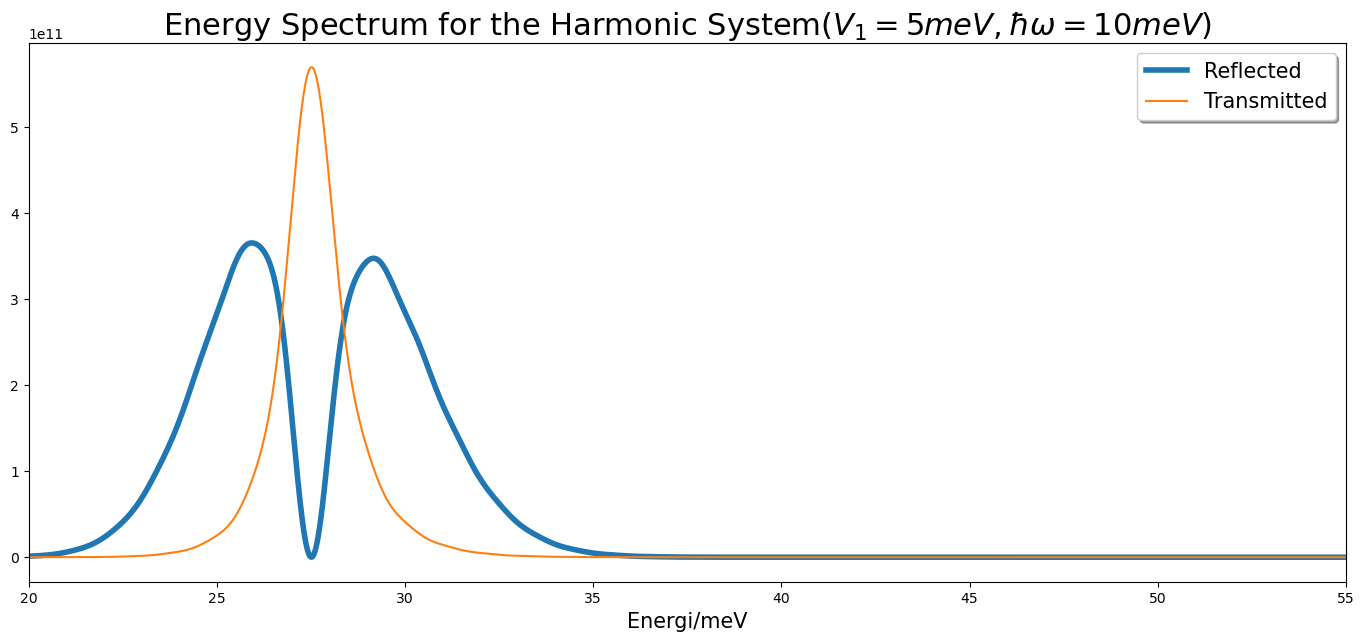

In [17]:

Energi_specture = ( (freq)* hbar)**2/(2 * m)




plt.figure(figsize=(17,7))
#plt.plot(freq, Transformed_total, label = 'Total')
plt.title('Energy Spectrum for the Harmonic System${(V_1 = 5meV,\hbar\omega =10meV)}$', fontsize= 22)
plt.plot(np.abs(Energi_specture)/elementary_charge*1e3, np.abs(Transformed_reflected)**2, linewidth=4, label = 'Reflected')
plt.plot(Energi_specture/elementary_charge*1e3, np.abs(Transformed_transmited)**2, label = 'Transmitted')
plt.xlim(20, 55)
# plt.ylim(0,2e10)
plt.xlabel('Energi/meV', fontsize=15)
# plt.ylabel('How much of each Energi', fontsize=15)

plt.legend(shadow=True, loc='upper right', prop={'size': 15})
plt.show()